# F Stats

In [2]:
#Load your packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random


%matplotlib inline

In [3]:
#https://docs.scipy.org/doc/scipy/reference/stats.html

# But What is it?

F stat has two degrees of freedom!  The numerator dof goes first!

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1429: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


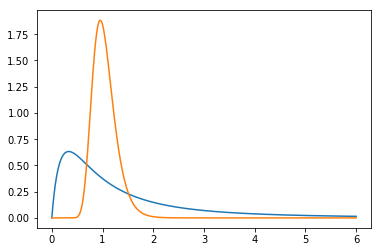

In [8]:
x= np.arange(0,6,0.001)
plt.plot(x, stats.f.pdf(x,4,4))
plt.plot(x, stats.f.pdf(x,300,50))

plt.show()

It really differs as you change the degrees of freedom!  I am going to use code from an earlier example to get normal data and show the Q-Q or P-P plot.

In [9]:
#Let's try it!

r = stats.randint.rvs(1,7,size=1)

In [10]:
r #I just rolled the die!

array([4])

In [11]:
#Lets roll the die ten times and get the sum!
sum(stats.randint.rvs(1,7,size=10))

38

In [12]:
#Okay now I am going to get that random sum a whole bunch of times!
n = 1000 #number of 10 dice rolls
dist = [] #initialize the new set

for i in range(0,n): #do below n times
    dist.append(sum(stats.randint.rvs(1,7,size=10))) #take the list 'dist' and add another rando to it

In [13]:
dist

[27,
 39,
 37,
 34,
 36,
 39,
 27,
 29,
 33,
 38,
 29,
 35,
 36,
 40,
 39,
 28,
 26,
 26,
 34,
 32,
 30,
 30,
 28,
 39,
 40,
 38,
 32,
 38,
 36,
 39,
 41,
 25,
 28,
 25,
 33,
 38,
 42,
 34,
 40,
 31,
 46,
 29,
 24,
 37,
 26,
 38,
 41,
 35,
 47,
 32,
 37,
 40,
 32,
 37,
 38,
 30,
 29,
 37,
 28,
 38,
 30,
 26,
 40,
 44,
 34,
 27,
 34,
 33,
 35,
 36,
 32,
 38,
 37,
 28,
 35,
 26,
 28,
 36,
 30,
 35,
 39,
 23,
 42,
 30,
 34,
 38,
 46,
 36,
 32,
 36,
 36,
 36,
 28,
 33,
 32,
 31,
 38,
 35,
 37,
 37,
 34,
 46,
 30,
 38,
 38,
 28,
 37,
 35,
 33,
 28,
 33,
 32,
 30,
 31,
 32,
 34,
 33,
 38,
 41,
 43,
 40,
 22,
 31,
 38,
 35,
 41,
 33,
 35,
 35,
 28,
 28,
 35,
 31,
 29,
 35,
 44,
 31,
 27,
 34,
 45,
 34,
 40,
 30,
 44,
 32,
 42,
 40,
 33,
 29,
 26,
 37,
 37,
 40,
 28,
 39,
 36,
 27,
 41,
 40,
 27,
 38,
 32,
 34,
 30,
 34,
 39,
 37,
 32,
 42,
 37,
 40,
 40,
 37,
 40,
 27,
 28,
 37,
 38,
 34,
 44,
 43,
 43,
 41,
 29,
 37,
 36,
 39,
 35,
 41,
 31,
 38,
 35,
 34,
 24,
 34,
 26,
 33,
 24,
 39,
 37,


In [14]:
#So now what should the distribution of these sums look like?

##NORMAL## with
mu =10*3.5
sd = np.sqrt(10*17.5/6)


Text(0.5,1,'Normal and Random Sum of Ten Dice')

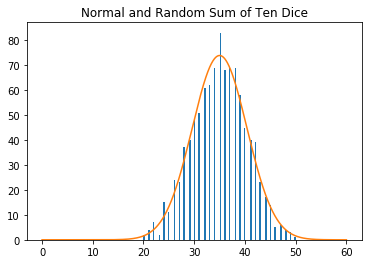

In [15]:
x= np.arange(0,60,0.001) #x values for the continuous function
plt.hist(dist,bins = 100) #histgram plot
plt.plot(x, n*stats.norm.pdf(x,mu,sd)) #make sure to center normal over mean and use correct standard deviation
plt.title('Normal and Random Sum of Ten Dice')

This is not really what the central limit theorem says though!  I need to take an average!

This will require just a few changes to the code above.

In [16]:
#Okay now I am going to get that random sum a whole bunch of times!
d = 10 #number of dice rolls
n = 1000 #number of times repeating experiment
dist = [] #initialize the new set

for i in range(0,n): #do below n times
    dist.append(sum(stats.randint.rvs(1,7,size=d))/d) #take the list 'dist' and add another rando to it

In [17]:
#So now what should the distribution of these sums look like?

##NORMAL## with
mu =3.5 #average of just one die roll
sd = np.sqrt(17.5/(6*d)) #standard deviation of one die divided by sqrt(d)

Text(0.5,1,'Normal and Random mean of 10 Dice')

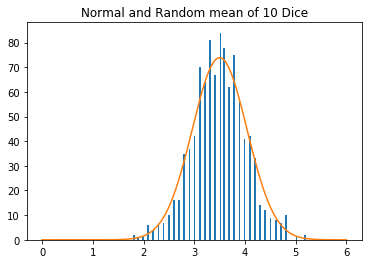

In [18]:
x= np.arange(0,6,0.001) #x values for the continuous function
plt.hist(dist,bins = 100) #histgram plot
plt.plot(x, n/d*stats.norm.pdf(x,mu,sd)) #make sure to center normal over mean and use correct standard deviation
plt.title('Normal and Random mean of {0} Dice'.format(d))

# Here is the non-Normal part

So dist is normal.  Lets take a sample of it

In [19]:
sample = []

for x in range(0,10): #
    p = stats.randint.rvs(0,len(dist))#gives random number based on length of numbers
    sample.append(dist[p]) #picks the random entry and adds it to the sample

In [20]:
sample

[3.7000000000000002,
 3.7999999999999998,
 3.0,
 3.3999999999999999,
 2.8999999999999999,
 3.7999999999999998,
 3.5,
 3.7999999999999998,
 2.7999999999999998,
 2.6000000000000001]

So this gave me one sample with 10 entries.  I know need to get a standard deviation.

In [21]:
np.std(sample, ddof=1)

0.46439925351648298

Great now lets do that a whole bunch of times!

In [22]:
distvar =[]
for y in range (0,1000):
    sample = []
    for x in range (0,10):
        p = stats.randint.rvs(0,len(dist))#gives random number based on length of numbers
        sample.append(dist[p]) #picks the random entry and adds it to the sample
    distvar.append(9*np.std(sample,ddof = 1)**2/sd**2)

In [23]:
distvar 


[15.071999999999992,
 4.4879999999999995,
 5.1737142857142837,
 15.637714285714281,
 11.893714285714282,
 13.837714285714281,
 3.3462857142857114,
 7.2994285714285683,
 3.9805714285714275,
 5.9108571428571439,
 5.2422857142857096,
 10.13485714285714,
 11.962285714285715,
 8.9005714285714284,
 19.985142857142861,
 13.097142857142849,
 18.226285714285705,
 4.1862857142857131,
 18.03771428571428,
 3.5691428571428552,
 10.35771428571428,
 8.1599999999999966,
 3.1679999999999984,
 9.1920000000000002,
 3.3908571428571408,
 13.906285714285705,
 7.5737142857142841,
 5.9142857142857119,
 6.8022857142857127,
 11.10857142857143,
 4.4022857142857141,
 11.550857142857138,
 3.8537142857142812,
 8.9691428571428489,
 8.8594285714285679,
 6.5005714285714262,
 6.4628571428571409,
 4.9679999999999964,
 5.5405714285714254,
 5.3519999999999994,
 8.6537142857142815,
 10.628571428571428,
 9.03771428571428,
 7.4365714285714271,
 15.445714285714285,
 10.028571428571423,
 8.0091428571428569,
 13.319999999999999

In [24]:
distvar2 =[]
for y in range (0,1000):
    distvar2.append(9*np.std(random.sample(dist,10),ddof = 1)**2/sd**2)




Text(0.5,1,'Python mathplotlib')

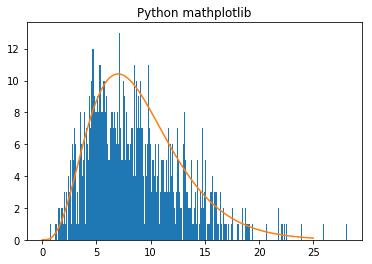

In [25]:
x= np.arange(0,25,0.0001) #x values for the continuous function
plt.hist(distvar2,bins=350) #histgram plot
plt.plot(x, 100*stats.chi2.pdf(x,9)) #make sure to center normal over mean and use correct standard deviation
plt.title('Python mathplotlib')

# Here is the New Part

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

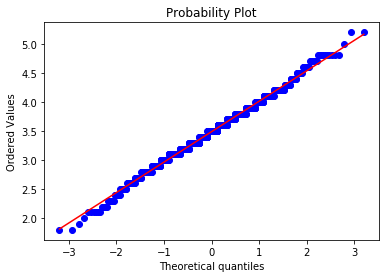

In [26]:
stats.probplot(dist, plot = plt) #if you scroll down far enough you can see that it fits the straight line very well (the data was normal!)

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

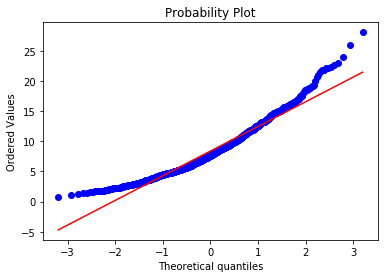

In [27]:
stats.probplot(distvar2, plot = plt) #here you see the data is not even close